In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style="darkgrid")
a=pd.read_csv("C:\\Users\Ogeid99\Desktop\DS\excel\catalogo_l'aquila.txt",sep='|')
a

,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName
0,1857689,2008-10-14T02:21:50.850000,42.235,13.515,13.1,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.6,--,2 km E Rocca di Cambio (AQ)
1,1861549,2008-10-30T02:16:37.440000,42.323,13.491,8.8,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.4,--,3 km N Fossa (AQ)
2,1863429,2008-11-10T01:56:14.140000,42.409,13.539,9.1,BULLETIN-SISPICK,NaN,NaN,NaN,ML,2.0,--,10 km N Poggio Picenze (AQ)
3,1868139,2008-12-12T18:58:51.600000,42.204,13.387,5.0,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.9,--,9 km W Rocca di Cambio (AQ)
4,1868339,2008-12-14T08:16:54.180000,42.356,13.467,9.3,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.6,--,6 km E L'Aquila (AQ)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9114,2132989,2009-11-19T16:20:21.220000,42.417,13.387,8.7,BULLETIN-SISPICK,NaN,NaN,NaN,ML,2.0,--,7 km N L'Aquila (AQ)
9115,2132999,2009-11-19T16:21:54.780000,42.410,13.376,10.0,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.6,--,7 km N L'Aquila (AQ)
9116,2133549,2009-11-20T22:45:50.530000,42.486,13.362,10.8,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.6,--,6 km SE Capitignano (AQ)
9117,2133719,2009-11-21T08:34:39.570000,42.471,13.356,16.1,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.4,--,6 km NE Pizzoli (AQ)


(0.7, 10000)

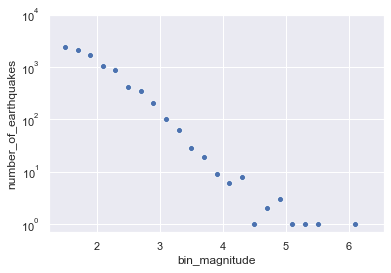

In [105]:
import math
binning=0.2
Mmin=1.4
#evaluation of maximum likelihood B^
magnitude=a['Magnitude']
b=math.log10(math.exp(1)/(np.mean(magnitude)-(Mmin-binning/2)))
#b=math.log(1/(np.mean(magnitude)-(Mmin-binning/2))(math.log(10)) according to 'a non robust method to estimate the b value'
#plot Gutemberg-Richter
bin_magnitude=pd.Series(np.array(np.arange(np.min(magnitude),np.max(magnitude)+0.2,0.2)))
number_of_earthquakes= pd.Series(np.array([np.count_nonzero((magnitude >= i ) & (magnitude <= i+0.2))
                                           for i in bin_magnitude]))
bin_magnitude=np.add(bin_magnitude,0.1)
df=pd.concat([bin_magnitude,number_of_earthquakes],axis=1)
df.columns=['bin_magnitude','number_of_earthquakes']

plot=sns.scatterplot(x='bin_magnitude',y='number_of_earthquakes',data=df)
plt.yscale('log')# an alternative:  plot.set(yscale="log")
plt.ylim((0.7, 10000)) # DO NOT put 0 or negative values 'cause there is a log scale


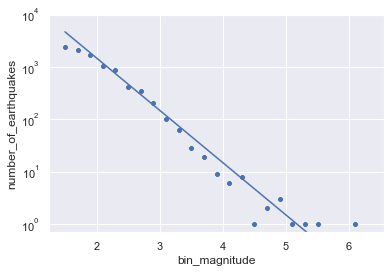

In [97]:
#remember to see a values on zmap
a=5.175
Gutemberg_Richter=np.power(10,5.175-bin_magnitude) #here you can consider b or not
plot=sns.scatterplot(x='bin_magnitude',y='number_of_earthquakes',data=df)
plt.yscale('log')# an alternative:  plot.set(yscale="log")
plt.ylim((0.7, 10000)) # DO NOT put 0 or negative values 'cause there is a log scale
plt.plot(bin_magnitude,Gutemberg_Richter)

exponential_distribution=np.power(10,5.175-np.arange(np.min(magnitude),np.max(magnitude),0.1)) #insert b 


In [140]:
new_bin_magnitude=pd.Series(np.array(np.arange(np.min(magnitude),np.max(magnitude)+0.2,0.05)))
new_Gutemberg_Richter=np.power(10,5.175-new_bin_magnitude) #here you can consider b or not
sumGR=new_Gutemberg_Richter.sum()
probabilities=np.divide(new_Gutemberg_Richter,sumGR)
probabilities

0     0.108750
1     0.096924
2     0.086384
3     0.076989
4     0.068617
        ...   
93    0.000002
94    0.000002
95    0.000002
96    0.000002
97    0.000002
Length: 98, dtype: float64

In [162]:
#draw from an exponential distribution
#for i in new_bin_magnitude:
for i in range(500):
    random_sample=np.random.choice(new_bin_magnitude,5000,p=probabilities)
    for j in new_bin_magnitude:
        counts=np.count_nonzero(i==j)
#sns.distplot(random_sample,kde=False)
counts
#plt.yscale('log')

0